In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
import re

import warnings
warnings.filterwarnings('ignore')

In [74]:
data = pd.read_excel('/content/drive/MyDrive/HornMT.xlsx')

data = shuffle(data)
data.head(1)

,Scope,Category,Source,Domain,Date,eng,aaf,amh,orm,som,tir
341,Global,Art and Culture,https://www.bbc.co.uk/news/uk-20914799; http:/...,www.bbc.co.uk; www.guardian.co.uk,2013-01-04,The Church of England drops its prohibition on...,Ingiliz Kanisa Sitacelta Naddoh Angarawal Sool...,በእንግሊዝ የሚገኙ ቤተ-ክርስትያናት በግብረሶማውያን ቀሳውስት ላይ አስቀም...,Waldaan Ingilaand luboota fedhii dhiira waliin...,Kaniisadda Ingriiska ayaa ka laabatay ka mamnu...,ቤተክርስቲያን ኢንግላንድ እቶም ኣብ ሲቨላዊ ጥምረት ዘለው ግብረሶዶም ካህ...


In [75]:
data = data[['Category', 'tir']]
data.head(1)

,Category,tir
341,Art and Culture,ቤተክርስቲያን ኢንግላንድ እቶም ኣብ ሲቨላዊ ጥምረት ዘለው ግብረሶዶም ካህ...


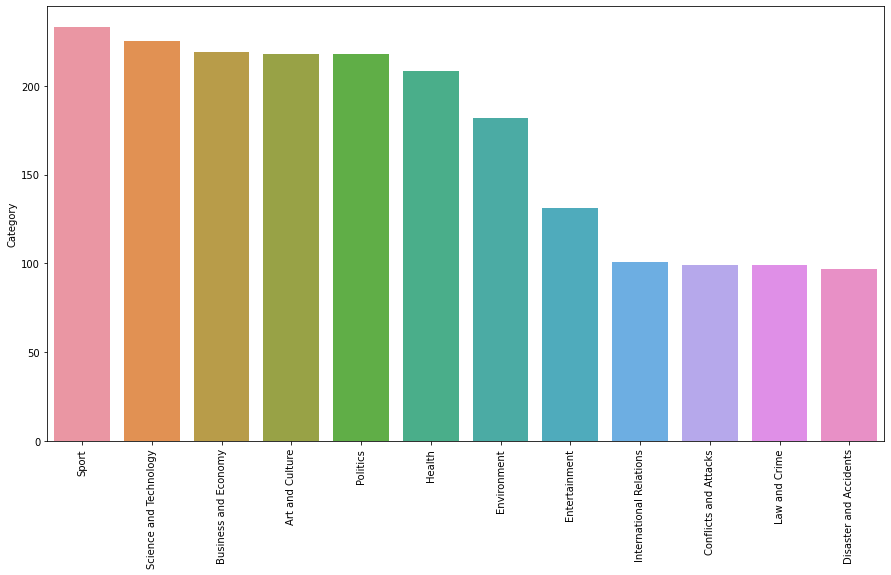

In [91]:
plt.figure(figsize=(15, 8))
cat = data['Category'].value_counts()
plt.xticks(rotation=90, fontsize=10)
sns.barplot(cat.index, cat)

In [77]:
cat_lookup = dict(zip(data.Category.unique(), data['Category'].value_counts()))
cat_lookup

{'Art and Culture': 233,
 'Sport': 225,
 'Conflicts and Attacks': 219,
 'Environment': 218,
 'Politics': 218,
 'Science and Technology': 208,
 'Business and Economy': 182,
 'Disaster and Accidents': 131,
 'Entertainment': 101,
 'Health': 99,
 'International Relations': 99,
 'Law and Crime': 97}

In [78]:
# Total number of words

num_words = data['tir'].apply(lambda x: len(x.split(' '))).sum()

print(f"Total # of words: {num_words}")

Total # of words: 43511


In [79]:
# Removing null and NaN values from all the rows

data.isna().sum()

Category    0
tir         0
dtype: int64

In [80]:
def char_level_missmatch(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሠ]','ሰ',rep6)
    rep8=re.sub('[ሡ]','ሱ',rep7)
    rep9=re.sub('[ሢ]','ሲ',rep8)
    rep10=re.sub('[ሣ]','ሳ',rep9)
    rep11=re.sub('[ሤ]','ሴ',rep10)
    rep12=re.sub('[ሥ]','ስ',rep11)
    rep13=re.sub('[ሦ]','ሶ',rep12)
    rep14=re.sub('[ዓኣዐ]','አ',rep13)
    rep15=re.sub('[ዑ]','ኡ',rep14)
    rep16=re.sub('[ዒ]','ኢ',rep15)
    rep17=re.sub('[ዔ]','ኤ',rep16)
    rep18=re.sub('[ዕ]','እ',rep17)
    rep19=re.sub('[ዖ]','ኦ',rep18)
    rep20=re.sub('[ጸ]','ፀ',rep19)
    rep21=re.sub('[ጹ]','ፁ',rep20)
    rep22=re.sub('[ጺ]','ፂ',rep21)
    rep23=re.sub('[ጻ]','ፃ',rep22)
    rep24=re.sub('[ጼ]','ፄ',rep23)
    rep25=re.sub('[ጽ]','ፅ',rep24)
    rep26=re.sub('[ጾ]','ፆ',rep25)

    #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  

    rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
    rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
    rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
    rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
    rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
    rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
    rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
    rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
    rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
    rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
    rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
    rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
    rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
    rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
    rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
    rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
    rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
    rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
    rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
    rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
    rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
    rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ  

    return rep48

In [81]:
data['tir'] = data['tir'].str.replace('[^\w\s]','')

In [82]:
data['tir'] = data['tir'].apply(lambda x: char_level_missmatch(x))

In [83]:
X, y = data['tir'].values, data['Category'].values

In [84]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

"""
      LogisticRegression(solver='newton-cg',penalty='l2', C=0.001, max_iter=1000),
      LogisticRegression(solver='lbfgs',penalty='l2',C=0.001, max_iter=1000),
      LogisticRegression(solver='sag',penalty='l2',C=0.001, max_iter=1000),
      LogisticRegression(solver='saga',penalty='l2',C=0.001, max_iter=1000)
"""

lr = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()), # max_features=1500, min_df=5, max_df=0.7
                ('clf', LogisticRegression(solver = 'liblinear', C=15, penalty = 'l2')),
               ])
lr.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=15, solver='liblinear'))])

In [86]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = lr.predict(X_test)

print(f'accuracy {accuracy_score(y_pred, y_test)}')
print(classification_report(y_test, y_pred))

accuracy 0.6231527093596059
                         precision    recall  f1-score   support

        Art and Culture       0.41      0.53      0.46        36
   Business and Economy       0.60      0.67      0.64        43
  Conflicts and Attacks       0.59      0.48      0.53        21
 Disaster and Accidents       0.88      0.70      0.78        20
          Entertainment       0.86      0.58      0.69        33
            Environment       0.53      0.42      0.47        43
                 Health       0.68      0.70      0.69        40
International Relations       0.47      0.47      0.47        15
          Law and Crime       0.60      0.35      0.44        17
               Politics       0.54      0.71      0.61        42
 Science and Technology       0.59      0.64      0.62        50
                  Sport       0.87      0.89      0.88        46

               accuracy                           0.62       406
              macro avg       0.64      0.59      0.61      

In [87]:
# SGD Classifier

from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(alpha=0.001, max_iter=5, tol=None))])

In [88]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = sgd.predict(X_test)

print(f'accuracy {accuracy_score(y_pred, y_test)}')
print(classification_report(y_test, y_pred))

accuracy 0.645320197044335
                         precision    recall  f1-score   support

        Art and Culture       0.52      0.44      0.48        36
   Business and Economy       0.58      0.67      0.62        43
  Conflicts and Attacks       0.63      0.57      0.60        21
 Disaster and Accidents       0.85      0.85      0.85        20
          Entertainment       0.80      0.73      0.76        33
            Environment       0.53      0.47      0.49        43
                 Health       0.58      0.75      0.65        40
International Relations       0.50      0.67      0.57        15
          Law and Crime       0.60      0.35      0.44        17
               Politics       0.67      0.62      0.64        42
 Science and Technology       0.68      0.60      0.64        50
                  Sport       0.79      0.91      0.85        46

               accuracy                           0.65       406
              macro avg       0.64      0.64      0.63       